## Introduction
This project is on a data set from Prosper, which is America’s first marketplace lending platform, with over $7 billion in funded loans. This data set contains 113,937 loans with 81 variables on each loan,  including loan amount, borrower rate (or interest rate), current loan  status, borrower income, borrower employment status, borrower credit  history, and the latest payment information.

The main purpose of this project is to summarize the characteristics of  variables that can affect the loan status and to get some ideas about the  relationships among multiple variables using summary statistics and data  visualizations.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

%matplotlib inline

In [4]:
# load data
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.shape

(113937, 81)

In [5]:
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [7]:
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


## Univariate Analysis

### 1. Analyze number of listings in each state 
The data says the highest listing counts in CA, TX, NY, FL and IL, which tracks with the rankings of top US states by population and the least in WY, ME, ND. In other words, the Prosper listings are distributed similarly to the population of the US.

In [8]:
states_count = loan_data.BorrowerState.value_counts()

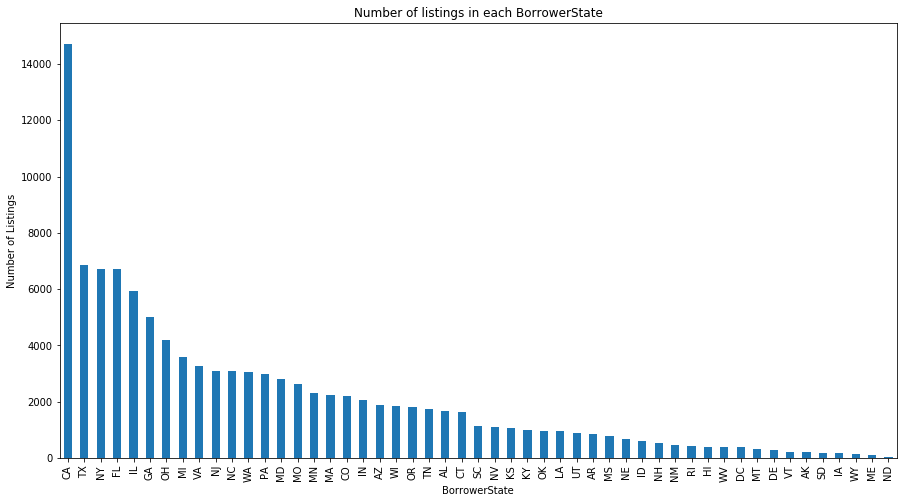

In [9]:
color = sb.color_palette()[0]

plt.figure(figsize=(15, 8))
states_count.plot(kind='bar', color=color);

plt.title('Number of listings in each BorrowerState');
plt.xlabel('BorrowerState');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90);

### 2. The number of listings under each LoanStatus available
The number of listings in each LoanStatus type are analyzed and the plot shows that Current status has got the highest number of listings followed by Completed and Chargedoff. Other statuses include dues for various intervals and cancelled whose frequency is too less

In [10]:
status_count = loan_data.LoanStatus.value_counts()

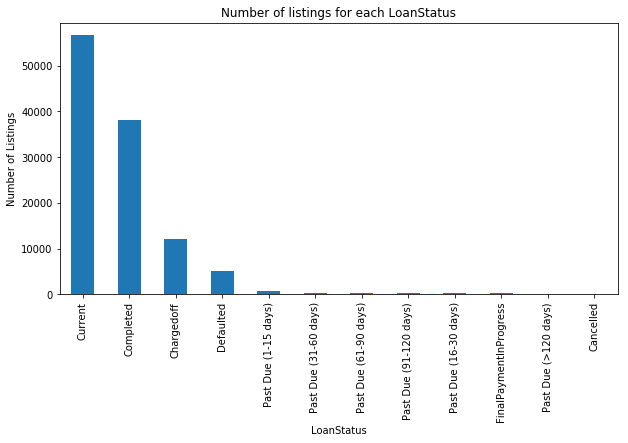

In [11]:
color = sb.color_palette()[0]

plt.figure(figsize=(10, 5))
status_count.plot(kind='bar', color=color);

plt.title('Number of listings for each LoanStatus');
plt.xlabel('LoanStatus');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90);

### 3. Income rate distribution of listings
The income rate distribution is analyzed to know the average income rate of listings. The plot says that most listings fall under 50000 dollars, followed by 50000-74999 dollars and so on. This also concludes that the more the income rate the less the listings count.

In [12]:
income_range_count = loan_data.IncomeRange.value_counts()

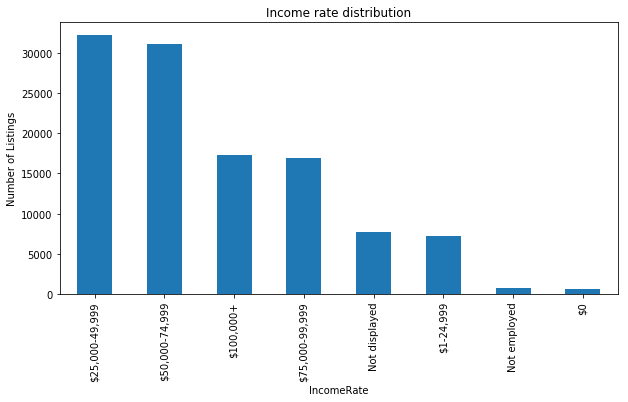

In [13]:
color = sb.color_palette()[0]

plt.figure(figsize=(10, 5))
income_range_count.plot(kind='bar', color=color);

plt.title('Income rate distribution');
plt.xlabel('IncomeRate');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90);

## Bivariate Analysis

In [14]:
loan_data.AvailableBankcardCredit.describe()

count    106393.000000
mean      11210.225447
std       19818.361309
min           0.000000
25%         880.000000
50%        4100.000000
75%       13180.000000
max      646285.000000
Name: AvailableBankcardCredit, dtype: float64

In [15]:
loan_data.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

### 1. AvailableBankcardCredit vs. BorrowerRate
Here the available bank credit and borrower rate is compared. The plot says that the more the amount in their bank card, the less the loans they take and less the borrower rate in most cases.

Text(0.5,1,'AvailableBankcardCredit vs. BorrowerRate')

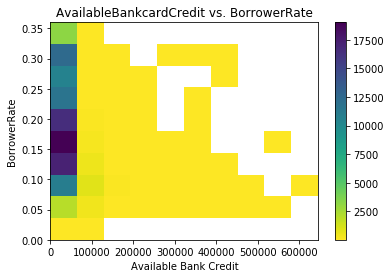

In [16]:
loan_data_sub = loan_data.loc[loan_data.AvailableBankcardCredit.notnull()]

plt.hist2d(data=loan_data_sub, x='AvailableBankcardCredit', y='BorrowerRate', cmap = 'viridis_r', cmin = 0.5);
plt.colorbar()

plt.xlabel('Available Bank Credit')
plt.ylabel('BorrowerRate')
plt.title('AvailableBankcardCredit vs. BorrowerRate')

### 2. Income range vs ProsperPrincipalBorrowed
The income range and principal amount borrowed from Prosper is analyzed in this section. The boxplot's medians are in increasing order i.e., the more the income range the more the principal amount borrowed from the Prosper except for the not employed or 0 dollar salaried.

In [17]:
loan_data.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

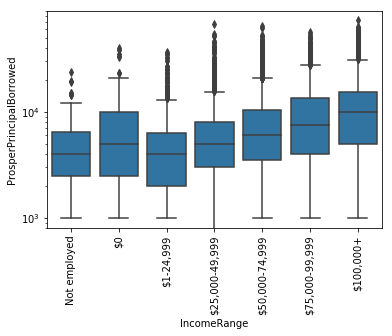

In [20]:
order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
sb.boxplot(data=loan_data, x='IncomeRange', y='ProsperPrincipalBorrowed', color=color, order=order);
plt.yscale('log')

plt.xticks(rotation=90);
# plt.yticks([100000, 200000, 300000, 400000, 500000, 600000]);

### 3. BorrowerRate pattern over years
The borrower rate pattern over years is analyzed. It increased from 2005-2006 and then fell off from 2006-2007 and then it constantly picked up for some years and reached it's peak in 2011 which then started decreasing constantly

In [21]:
loan_data['year'] = loan_data.ListingCreationDate.str.split('-').str[0]

In [22]:
year_data = loan_data.year.value_counts()

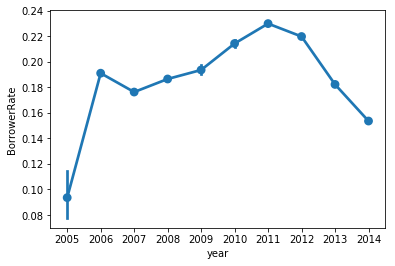

In [23]:
sb.pointplot(data=loan_data, x='year', y='BorrowerRate');

## Mutlivariate Analysis

### Analyse how the BorrowerRate changed over years for Homeowners vs Non-Homeowners
The borrower rate increased for some years in case of non homeowners, however it constantly decreased around 2010. As regards of homeowners, there wasn't much difference till 2009 but after 2009, the graph did go up till 2011 and started falling off.

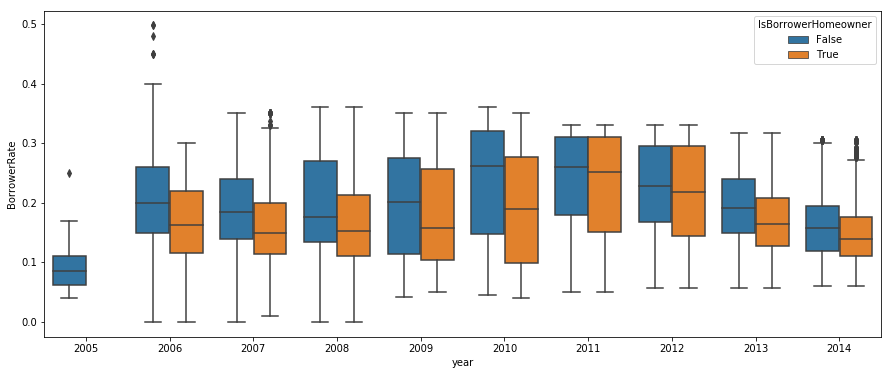

In [24]:
g = sb.boxplot(data=loan_data, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner');
g.figure.set_figwidth(15)
g.figure.set_figheight(6)